In [1]:
"""\
# Copyright (C) 2023 Jesús Bautista Villar <jesbauti20@gmail.com>
- Testing a proportional 3D heading control algorithm -
"""

import os
import numpy as np

# -- Graphic tools --
import matplotlib.pyplot as plt

# -- Our utils --
from simulations.utils.tools_math import *
from simulations.utils.tools_plot import *

from simulations.utils.tools_basic import createDir
from simulations.sim_test import sim_test
from simulations.sim_ss_test import sim_ss_test


# Create the output directory
OUTPUT_FOLDER = os.path.join("output")
createDir(OUTPUT_FOLDER)

The directory 'output' already exists!


## Some tests in $\mathrm{SO}(3)$

In [2]:
from simulations.utils.tools_math import rot_3d_matrix, so3_hat, so3_vee, theta_distance_from_R, exp_map, log_map_of_R

In [3]:
# YAW
psi = -np.pi/5
# PITCH
theta = np.pi/5
# ROLL
phi = 0
R = rot_3d_matrix(psi, theta, phi)

# ----
W = log_map_of_R(R)
omega = so3_vee(W)

mu_Re = np.sqrt(omega[0]**2 + omega[1]**2 + omega[2]**2) # Ra = I

mu_Re = theta_distance_from_R(R)
# ----
x = np.array([[1,0,0]]).T # = m_d

delta = np.squeeze(np.arccos(x.T @ R @ x))
delta_ang = np.arccos(np.cos(psi)*np.cos(theta))
# ----

print(R)
print(omega)

print("\ndelta:", delta)
print("delta_ang:", delta_ang)
print("sum yaw-pith:", abs(psi) + abs(theta))

print("\nmu:", mu_Re)
print("sum anges:", abs(psi) + abs(theta) + abs(phi))

[[ 0.65  0.48  0.59]
 [-0.59  0.81  0.  ]
 [-0.48 -0.35  0.81]]
(-0.1986048609862996, 0.6113229104434634, -0.6103932538413521)

delta: 0.863211890069541
delta_ang: 0.8572639783997528
sum yaw-pith: 1.2566370614359172

mu: 0.8827878067596949
sum anges: 1.2566370614359172


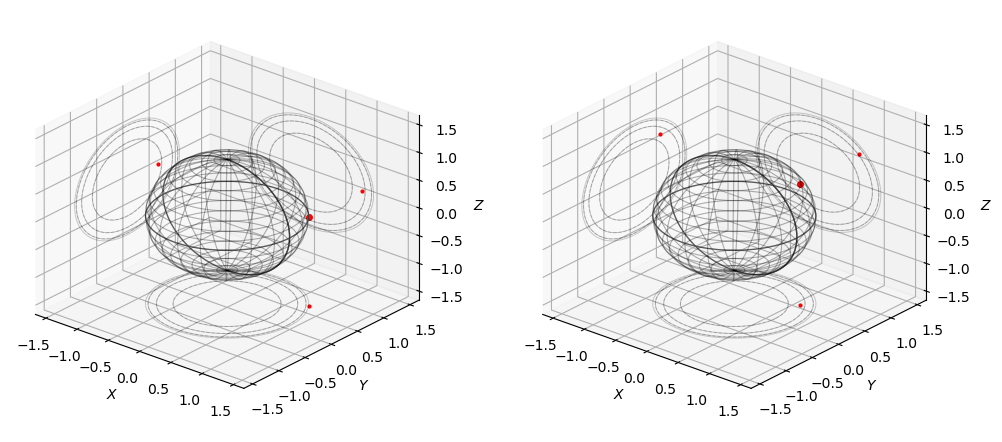

In [6]:
R1 = rot_3d_matrix(psi, 0, 0)
R2 = rot_3d_matrix(psi, theta, phi)

fig  = plt.figure(figsize=(12,12))
grid = plt.GridSpec(1, 2, hspace=0, wspace=0.2)

ax1 = fig.add_subplot(grid[:, 0], projection='3d')
ax2 = fig.add_subplot(grid[:, 1], projection='3d')

# Plotting the 3D heading trajectory
plot_heading_traj(R1, ax=ax1, lim=1.6)
plot_heading_traj(R2, ax=ax2, lim=1.6)

## Simulation frame to test the 3D heading controller

 36%|███▋      | 438/1201 [00:00<00:00, 803.34it/s]/home/jesus/Workspace/research/code/source_seeking_3D/simulations/utils/tools_math.py:89: RuntimeWarning: invalid value encountered in sqrt
  omega_pi = np.sqrt((np.array([R[0,0], R[1,1], R[2,2]])+1)/2)
100%|██████████| 1201/1201 [00:01<00:00, 654.35it/s]


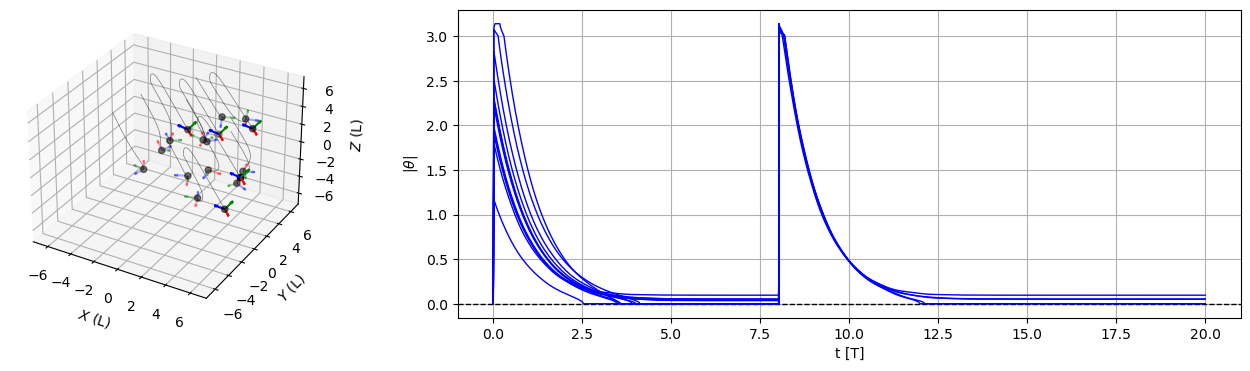

In [23]:
# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_test(n_agents=12, tf=20, wx=2*np.pi, 
                     L1=np.array([[-1,1,0]])/np.sqrt(2), L1_2=np.array([[1,-1,0]])/np.sqrt(2), t2=8,
                     v_rotation=True, fb_control=True, sim_kw={"kw":1}, arr_len=1)
sim_frame.numerical_simulation()

# Plot the summary (initial + final state)
sim_frame.plot_summary()

Animation parameters:  {'fps': 60.0, 'tf': 20, 'frames': 1199}


  0%|          | 1/1199 [00:00<?, ?it/s]

 38%|███▊      | 458/1199 [01:22<02:35,  4.76it/s]

KeyboardInterrupt: 

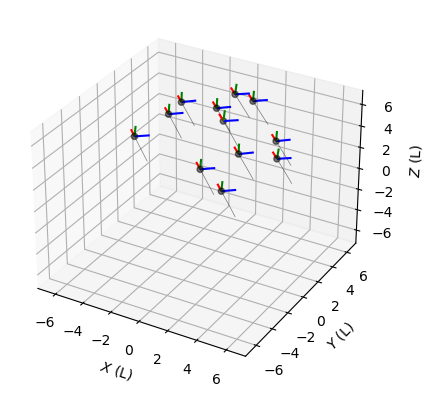

In [24]:
# Generate an animation of the whole simulation
sim_frame.generate_animation(OUTPUT_FOLDER)

/home/jesus/Workspace/research/code/source_seeking_3D/simulations/utils/tools_math.py:89: RuntimeWarning: invalid value encountered in sqrt
  omega_pi = np.sqrt((np.array([R[0,0], R[1,1], R[2,2]])+1)/2)


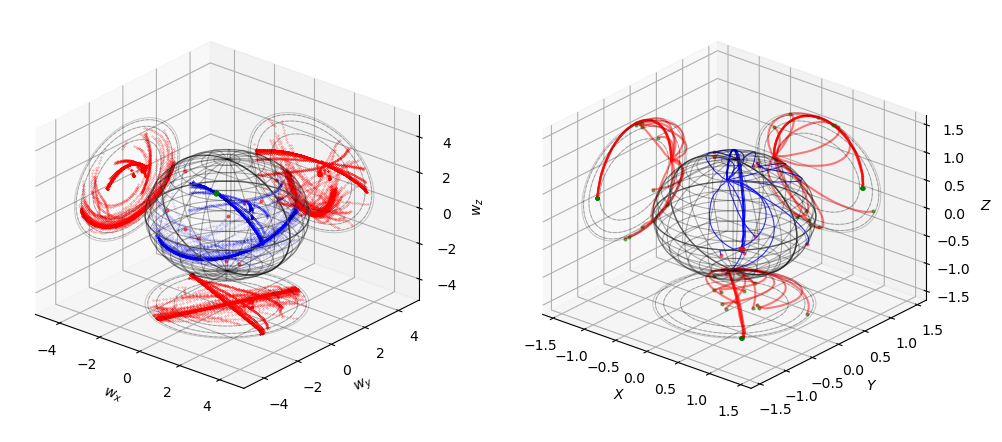

In [25]:
# Extract the desired data (R matrices)
data_R = sim_frame.data["R"]

fig  = plt.figure(figsize=(12,12))
grid = plt.GridSpec(1, 2, hspace=0, wspace=0.2)

ax1 = fig.add_subplot(grid[:, 0], projection='3d')
ax2 = fig.add_subplot(grid[:, 1], projection='3d')

# Plotting the SO(3) trajectory
plot_so3_traj(data_R, ax=ax1, lim=5)

# Plotting the 3D heading trajectory
plot_heading_traj(data_R, ax=ax2, lim=1.6)

## Plotting trajectories in $\mathrm{SO}(3)$

In [20]:
# Initialise the simulation frame and launch the numerical simulation
L1 = np.array([[1,0,0]])
sim_frame = sim_test(n_agents=10, tf=12, wx=np.pi/2, L1=L1/np.linalg.norm(L1), t2=40,
                      v_rotation=False, fb_control=True, sim_kw={"kw":4}, arr_len=1)
sim_frame.numerical_simulation()

# Extract the desired data (R matrices)
data_R = sim_frame.data["R"]
print(data_R.shape)

  0%|          | 0/721 [00:00<?, ?it/s]

100%|██████████| 721/721 [00:00<00:00, 1036.97it/s]

(721, 10, 3, 3)


/home/jesus/Workspace/research/code/source_seeking_3D/simulations/utils/tools_math.py:89: RuntimeWarning: invalid value encountered in sqrt
  omega_pi = np.sqrt((np.array([R[0,0], R[1,1], R[2,2]])+1)/2)


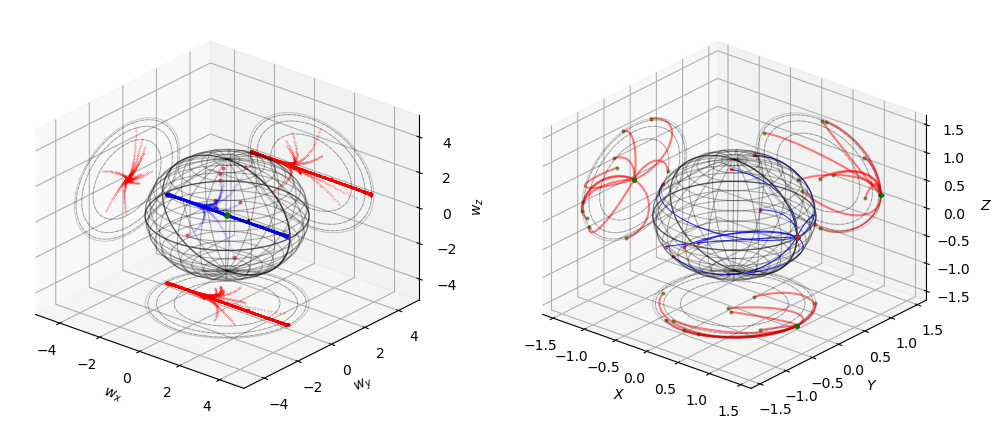

In [21]:
fig  = plt.figure(figsize=(12,12))
grid = plt.GridSpec(1, 2, hspace=0, wspace=0.2)

ax1 = fig.add_subplot(grid[:, 0], projection='3d')
ax2 = fig.add_subplot(grid[:, 1], projection='3d')

# Plotting the SO(3) trajectory
plot_so3_traj(data_R, ax=ax1, lim=5)

# Plotting the 3D heading trajectory
plot_heading_traj(data_R, ax=ax2, lim=1.6)

## Source seeking in 3D (WIP)

100%|██████████| 1501/1501 [00:01<00:00, 1187.03it/s]


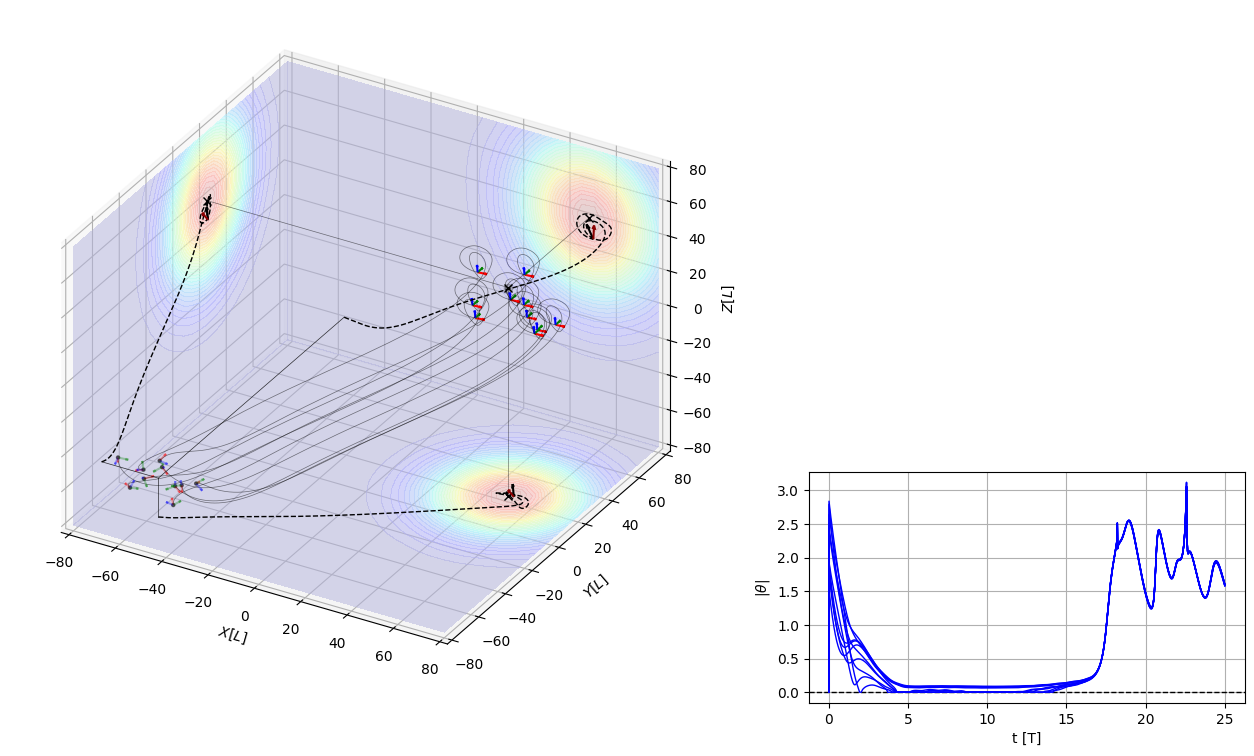

In [6]:
# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_ss_test(n_agents=10, tf=25, wx=2*np.pi, sim_kw={"kw":0.9})
sim_frame.numerical_simulation()

# Plot the summary (initial + final state)
sim_frame.plot_summary(dpi=200)

100%|█████████▉| 1498/1499 [09:48<00:00,  2.54it/s]


Animation parameters:  {'fps': 60.0, 'tf': 25, 'frames': 1499}


100%|█████████▉| 1498/1499 [01:48<00:00, 13.95it/s]

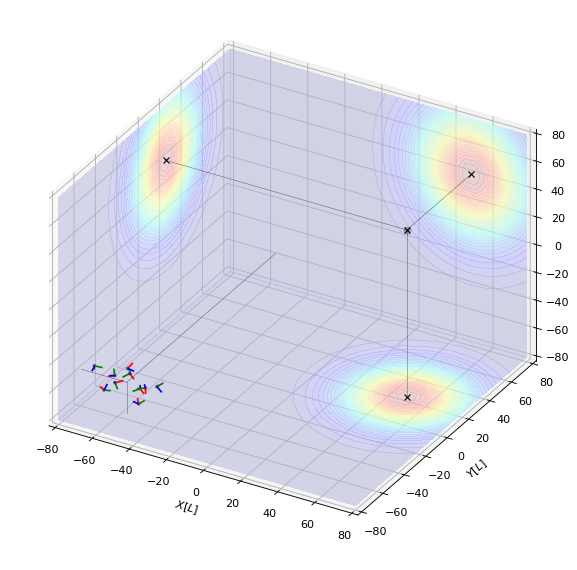

100%|█████████▉| 1498/1499 [02:06<00:00, 13.95it/s]

In [7]:
# Generate an animation of the whole simulation
sim_frame.generate_animation(OUTPUT_FOLDER, res_label="HD")